# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
lat = []
long = []
temp = []
humidity = []
windspeed = []
city_name = []
clouds = []
country = []
date_date = []

for city in cities:
    url_url = f"http://api.openweathermap.org/data/2.5/weather?&q={city}&appid={weather_api_key}"
    response = requests.get(url_url)
    responsej = response.json()
    time.sleep(.5)
    try:
        lat.append(responsej['coord']['lat'])
        long.append(responsej['coord']['lon'])
        temp.append(responsej['main']['temp'])
        humidity.append(responsej['main']['humidity'])
        windspeed.append(responsej['wind']['speed'])
        city_name.append(responsej['name'])
        country.append(responsej['sys']['country'])
        date_date.append(responsej['dt'])
        clouds.append(responsej['clouds']['all'])
        print(f"getting data from {city}")
    except:
        print(f"{city} not found")
        pass
    #break
    
#print(url_url)
#responsej

getting data from kavieng
getting data from rikitea
getting data from vangaindrano
getting data from jamestown
getting data from salalah
getting data from punta arenas
getting data from aklavik
getting data from port elizabeth
getting data from tiksi
getting data from saint-philippe
getting data from albany
getting data from dingle
getting data from pacific grove
getting data from dunda
getting data from tezu
getting data from dikson
getting data from chuy
getting data from qaanaaq
getting data from mar del plata
getting data from maketu
getting data from tasiilaq
burica not found
getting data from bluff
getting data from pevek
getting data from stafford
getting data from ponta do sol
getting data from mataura
getting data from ushuaia
getting data from russell
getting data from byron bay
taolanaro not found
getting data from hermanus
cumaribo not found
getting data from hobart
getting data from busselton
getting data from atar
getting data from port lincoln
getting data from boditi
ge

getting data from valleyview
getting data from santa maria
getting data from puerto suarez
getting data from newport
getting data from tautira
getting data from lagos
getting data from chimoio
getting data from kahului
getting data from lavrentiya
getting data from bakau
getting data from taoudenni
getting data from gimbi
getting data from tazovskiy
getting data from bhagwantnagar
getting data from ayorou
saleaula not found
getting data from darhan
getting data from dubbo
getting data from saint-pierre
getting data from ljungby
ngukurr not found
getting data from salinopolis
getting data from panguna
getting data from thomaston
getting data from krasnogorsk
getting data from zaria
sentyabrskiy not found
getting data from tete
getting data from beringovskiy
getting data from manggar
getting data from nador
getting data from rawson
getting data from verkhoyansk
getting data from corsicana
getting data from tuktoyaktuk
umm jarr not found
getting data from khatanga
getting data from mitu
g

In [13]:
print(lat)
print(long)
print(temp)
print(humidity)
print(windspeed)
print(city_name)
print(country)
print(date_date)
print(clouds)

[-2.5744]
[150.7967]
[301.5]
[67]
[2.95]
['Kavieng']
['PG']
[1615412218]
[98]


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
summary_city_info = {"City": city_name, 
                     "Lat": lat, 
                     "Lng": long,
                     "Max Temp": temp,
                     "Humidity": humidity, 
                     "Cloudiness": clouds, 
                     "Wind Speed": windspeed, 
                     "Country": country, 
                     "date": date_date}
summary_city_info_df = pd.DataFrame(summary_city_info)
summary_city_info_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,date
0,Kavieng,-2.5744,150.7967,301.50,67,98,2.95,PG,1615412938
1,Rikitea,-23.1203,-134.9692,299.22,75,11,7.79,PF,1615412939
2,Vangaindrano,-23.3500,47.6000,297.30,87,40,2.31,MG,1615412940
3,Jamestown,42.0970,-79.2353,287.94,27,1,5.61,US,1615412235
4,Salalah,17.0151,54.0924,297.15,41,0,2.06,OM,1615412390


In [48]:
southhem = summary_city_info_df['Lat'] < 0
northhem = summary_city_info_df['Lat'] > 0

In [54]:
summary_city_info_df[northhem]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,date
3,Jamestown,42.0970,-79.2353,287.94,27,1,5.61,US,1615412235
4,Salalah,17.0151,54.0924,297.15,41,0,2.06,OM,1615412390
6,Aklavik,68.2191,-135.0107,260.15,78,90,2.06,CA,1615412175
8,Tiksi,71.6872,128.8694,242.48,83,78,10.67,RU,1615412395
10,Albany,42.6001,-73.9662,284.65,33,40,6.17,US,1615412133
...,...,...,...,...,...,...,...,...,...
561,Tessalit,20.1986,1.0114,294.64,20,100,5.17,ML,1615413385
563,Felipe Carrillo Puerto,19.5833,-88.0500,300.53,54,76,3.59,MX,1615413387
564,Bilibino,68.0546,166.4372,244.50,79,0,1.26,RU,1615413388
566,Adré,13.4667,22.2000,297.35,16,0,5.70,TD,1615413389


In [21]:
summary_city_info_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,19.909268,21.681328,284.515775,72.966549,51.903169,3.707095,1.615413e+09
std,33.535072,88.624244,16.227768,20.519890,38.868513,2.905879,2.008137e+02
min,-54.800000,-179.166700,236.050000,4.000000,0.000000,0.190000,1.615412e+09
25%,-8.259175,-54.345800,274.357500,64.000000,10.000000,1.547500,1.615413e+09
50%,22.426100,24.693050,290.740000,79.000000,54.000000,3.085000,1.615413e+09
75%,49.271675,100.164475,297.655000,88.000000,90.000000,5.140000,1.615413e+09
max,78.218600,179.316700,306.740000,100.000000,100.000000,16.460000,1.615413e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# there are none that was found through the .describe() above


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

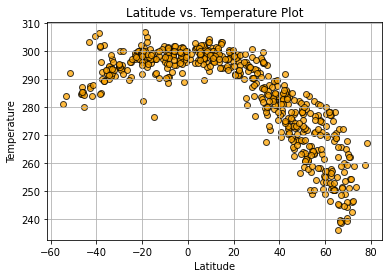

In [31]:
#plt.scatter x,y,marker,facecolor,edgecolor,s=,alpha
lataxis = summary_city_info_df['Lat']
tempaxis = summary_city_info_df['Max Temp']
humaxis = summary_city_info_df['Humidity']
cldaxis = summary_city_info_df['Cloudiness']
wndaxis = summary_city_info_df['Wind Speed']

plt.scatter(lataxis,tempaxis,marker='o',facecolor='orange',edgecolor='black',alpha=0.75)
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.show()
#This is analyzing that there is a good coorelation between latitude and temperature

## Latitude vs. Humidity Plot

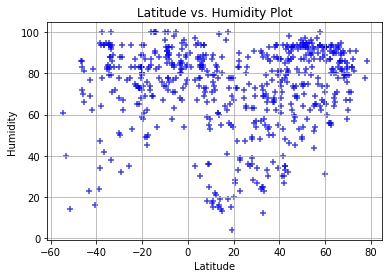

In [36]:
plt.scatter(lataxis,humaxis,marker='+',facecolor='blue',edgecolor='black',alpha=0.75)
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.show()
#this is showing that the latitude does not give a clear answer about the humidity

## Latitude vs. Cloudiness Plot

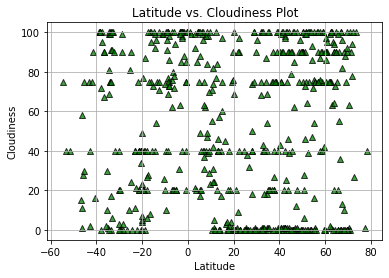

In [37]:
plt.scatter(lataxis,cldaxis,marker='^',facecolor='green',edgecolor='black',alpha=0.75)
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.show()
#this is showing that the latitudes greater than 0 have a higher cloud cover

## Latitude vs. Wind Speed Plot

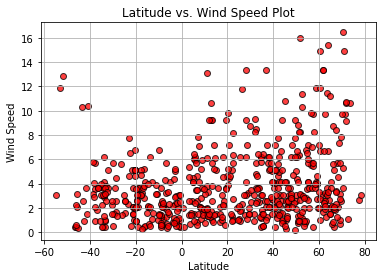

In [35]:
plt.scatter(lataxis,wndaxis,marker='o',facecolor='red',edgecolor='black',alpha=0.75)
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.show()
#this is showing that windspeed, ragardless of latitude, typically stays lower,
#though peeks higher more frequently as we get above the equator

## Linear Regression

In [164]:
#    variables for the hemisphere data
#northhem
#southhem

# max temp
nortemp = summary_city_info_df[northhem]['Max Temp']
soutemp = summary_city_info_df[southhem]['Max Temp']
# latitude
norlat = summary_city_info_df[northhem]['Lat']
soulat = summary_city_info_df[southhem]['Lat']
# humidity %
norhum = summary_city_info_df[northhem]['Humidity']
souhum = summary_city_info_df[southhem]['Humidity']
# cloudiness %
norcloud = summary_city_info_df[northhem]['Cloudiness']
soucloud = summary_city_info_df[southhem]['Cloudiness']
# wind speed mph
norwind = summary_city_info_df[northhem]['Wind Speed']
souwind = summary_city_info_df[southhem]['Wind Speed']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7907050851004832
This says the Max Temp and Latitude in the Northern Hemisphere as a coorelation of 0.79% which is a great coorelation


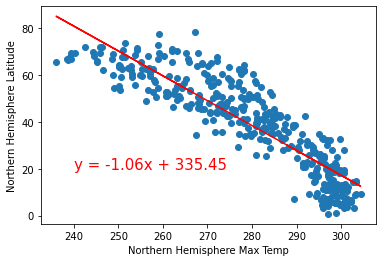

In [171]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nortemp, norlat)
regress_values = nortemp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nortemp, norlat)
plt.plot(nortemp,regress_values,"r-")
plt.annotate(line_eq,(240,20),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Max Temp')
plt.ylabel('Northern Hemisphere Latitude')
print(f"The r-squared is: {rvalue**2}")
rsquare_val = round(rvalue**2,2)
print(f"This says the Max Temp and Latitude in the Northern Hemisphere as a coorelation of {rsquare_val}% which is a great coorelation")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.24664009537608023
This says the Max Temp and Latitude in the Southern Hemisphere as a coorelation of 0.25% which says there is no coorelation


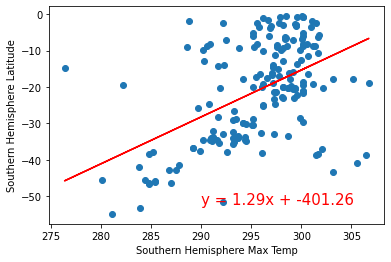

In [173]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(soutemp, soulat)
regress_values = soutemp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(soutemp, soulat)
plt.plot(soutemp,regress_values,"r-")
plt.annotate(line_eq,(290,-52),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Max Temp')
plt.ylabel('Southern Hemisphere Latitude')
print(f"The r-squared is: {rvalue**2}")
rsquare_val = round(rvalue**2,2)
print(f"This says the Max Temp and Latitude in the Southern Hemisphere as a coorelation of {rsquare_val}% which says there is no coorelation")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09337108637823141
This says the Humidity and Latitude in the Northern Hemisphere as a coorelation of 0.09% which says there is no coorelation


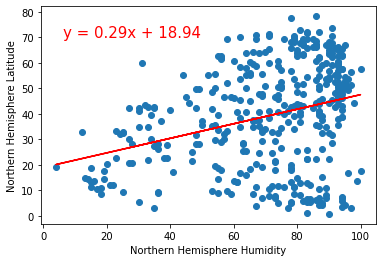

In [174]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(norhum, norlat)
regress_values = norhum * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(norhum, norlat)
plt.plot(norhum,regress_values,"r-")
plt.annotate(line_eq,(6,70),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Humidity')
plt.ylabel('Northern Hemisphere Latitude')
print(f"The r-squared is: {rvalue**2}")
rsquare_val = round(rvalue**2,2)
print(f"This says the Humidity and Latitude in the Northern Hemisphere as a coorelation of {rsquare_val}% which says there is no coorelation")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07950838685509176
This says the Humidity and Latitude in the Southern Hemisphere as a coorelation of 0.08% which says there is no coorelation


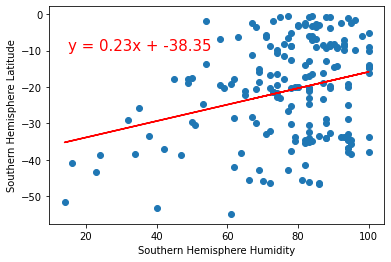

In [175]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(souhum, soulat)
regress_values = souhum * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(souhum, soulat)
plt.plot(souhum,regress_values,"r-")
plt.annotate(line_eq,(15,-10),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Humidity')
plt.ylabel('Southern Hemisphere Latitude')
print(f"The r-squared is: {rvalue**2}")
rsquare_val = round(rvalue**2,2)
print(f"This says the Humidity and Latitude in the Southern Hemisphere as a coorelation of {rsquare_val}% which says there is no coorelation")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.008783001035325918
This says the Cloudiness and Latitude in the Northern Hemisphere as a coorelation of 0.01% which says there is no coorelation


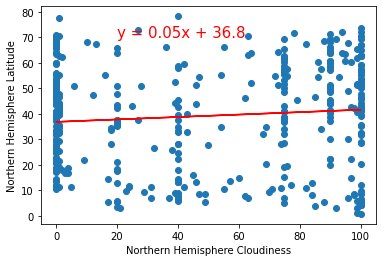

In [177]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(norcloud, norlat)
regress_values = norcloud * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(norcloud, norlat)
plt.plot(norcloud,regress_values,"r-")
plt.annotate(line_eq,(20,70),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Cloudiness')
plt.ylabel('Northern Hemisphere Latitude')
print(f"The r-squared is: {rvalue**2}")
rsquare_val = round(rvalue**2,2)
print(f"This says the Cloudiness and Latitude in the Northern Hemisphere as a coorelation of {rsquare_val}% which says there is no coorelation")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.056821625196230845
This says the Cloudiness and Latitude in the Southern Hemisphere as a coorelation of 0.06% which says there is no coorelation


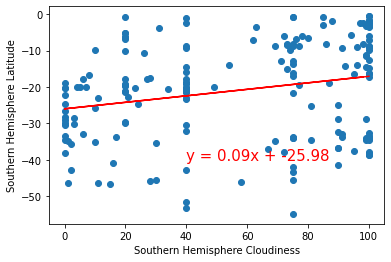

In [178]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(soucloud, soulat)
regress_values = soucloud * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(soucloud, soulat)
plt.plot(soucloud,regress_values,"r-")
plt.annotate(line_eq,(40,-40),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Cloudiness')
plt.ylabel('Southern Hemisphere Latitude')
print(f"The r-squared is: {rvalue**2}")
rsquare_val = round(rvalue**2,2)
print(f"This says the Cloudiness and Latitude in the Southern Hemisphere as a coorelation of {rsquare_val}% which says there is no coorelation")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02877691400661206
This says the Wind Speed and Latitude in the Northern Hemisphere as a coorelation of 0.03% which says there is no coorelation


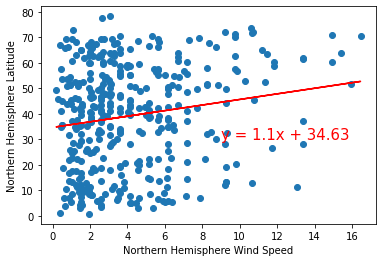

In [179]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(norwind, norlat)
regress_values = norwind * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(norwind, norlat)
plt.plot(norwind,regress_values,"r-")
plt.annotate(line_eq,(9,30),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Wind Speed')
plt.ylabel('Northern Hemisphere Latitude')
print(f"The r-squared is: {rvalue**2}")
rsquare_val = round(rvalue**2,2)
print(f"This says the Wind Speed and Latitude in the Northern Hemisphere as a coorelation of {rsquare_val}% which says there is no coorelation")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06670049486827548
This says the Wind Speed and Latitude in the Southern Hemisphere as a coorelation of 0.07% which says there is no coorelation


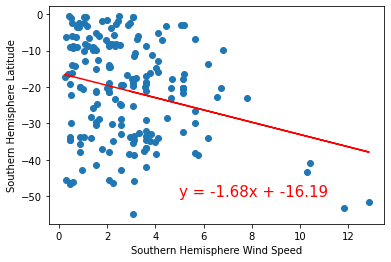

In [180]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(souwind, soulat)
regress_values = souwind * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(souwind, soulat)
plt.plot(souwind,regress_values,"r-")
plt.annotate(line_eq,(5,-50),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Wind Speed')
plt.ylabel('Southern Hemisphere Latitude')
print(f"The r-squared is: {rvalue**2}")
rsquare_val = round(rvalue**2,2)
print(f"This says the Wind Speed and Latitude in the Southern Hemisphere as a coorelation of {rsquare_val}% which says there is no coorelation")

plt.show()

In [181]:
summary_city_info_df.to_csv("Output/summarycityinfo.csv", index=False, header=True)